In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
# Import des libs
import pandas as pd

# Chargement
df = pd.read_csv("DataSet_Emails.csv", encoding="utf-8")

# Suppression colonne inutile (Unnamed)
df.drop(columns=[col for col in df.columns if col.lower().startswith("unnamed")], inplace=True)

# Aperçu des colonnes
print("Colonnes :", df.columns.tolist())

# Dimensions
print("Dimensions :", df.shape)

# Types des données
print("\nTypes des colonnes :")
print(df.dtypes)

# Quelques lignes
df.head()

Colonnes : ['message_id', 'text', 'label', 'label_text', 'subject', 'message', 'date']
Dimensions : (31716, 7)

Types des colonnes :
message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object


,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\r\nlead me not into...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\r\nperspective on ferc r...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\r\nready to boost ...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


Valeurs manquantes :
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Nombre de lignes dupliquées : 0

Distribution des emails :
label_text
spam    16163
ham     15553
Name: count, dtype: int64


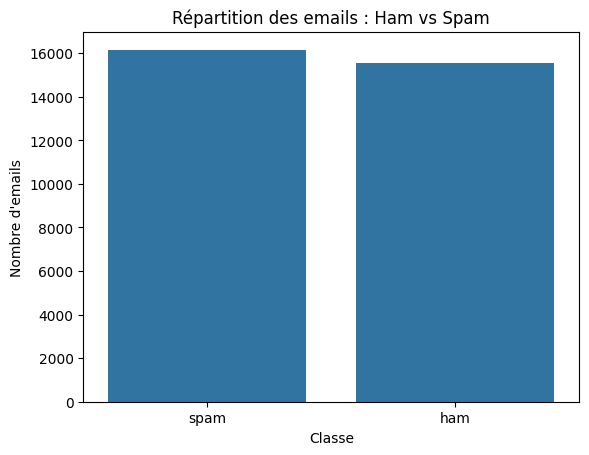

In [20]:
# 🔍 Valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())

# 🔁 Doublons
print("\nNombre de lignes dupliquées :", df.duplicated().sum())

# 📊 Répartition des classes
print("\nDistribution des emails :")
print(df['label_text'].value_counts())

# 📈 Visualisation graphique
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label_text')
plt.title("Répartition des emails : Ham vs Spam")
plt.xlabel("Classe")
plt.ylabel("Nombre d'emails")
plt.show()

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Télécharger les stopwords
nltk.download('stopwords')

# Initialiser stopwords et stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fonction de nettoyage sans word_tokenize
def preprocess_text(text):
    # 1. Mise en minuscules
    text = str(text).lower()
    # 2. Suppression ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Séparer en mots par split (au lieu de word_tokenize)
    tokens = text.split()
    # 4. Enlever stopwords
    tokens = [word for word in tokens if word.isalpha()]  # ❗ Garde uniquement les mots alphabetiques
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Appliquer le stemming
    tokens = [stemmer.stem(word) for word in tokens]
    # 6. Reconstruire le texte nettoyé
    return " ".join(tokens)

# Appliquer à toute la colonne
df['clean_text'] = df['text'].apply(preprocess_text)

# Affichage de vérification
df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,any software just for 15 $ - 99 $ understandin...,softwar understand oem softwar lead temptat fi...
1,perspective on ferc regulatory action client c...,perspect ferc regulatori action client conf ca...
2,wanted to try ci 4 lis but thought it was way ...,want tri ci li thought way expens viagra per d...
3,"enron / hpl actuals for december 11 , 2000 tec...",enron hpl actual decemb teco tap enron hpl ga ...
4,looking for cheap high - quality software ? ro...,look cheap high qualiti softwar rotat napoleon...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Initialisation du vectoriseur
tfidf = TfidfVectorizer(max_features=5000)

# 2. Apprentissage + transformation du texte
X = tfidf.fit_transform(df['clean_text'])

# 3. Récupération des étiquettes
y = df['label']

# 4. Affichage des dimensions
print("Dimensions de X :", X.shape)  # (nb_emails, nb_mots)

# 5. Récupérer les noms des colonnes (mots choisis)
feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_df.head()

# tfidf_df['aa'].unique()

Dimensions de X : (31716, 5000)


,aa,ab,abacha,abandon,abb,abel,abidjan,abiiiti,abil,abl,...,zhiyong,zimbabw,zimin,zip,zipper,zone,zonedubai,zu,zufferli,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Créer le modèle
nb_model = MultinomialNB()

# 3. Entraîner le modèle sur les données d'entraînement
nb_model.fit(X_train, y_train)

# 4.1 Prédiction sur les données d'entraînement
y_pred_train = nb_model.predict(X_train)

# 4.2 Prédiction sur les données de test (déjà faite)
y_pred_test = nb_model.predict(X_test)

# 5.1 Évaluation sur les données d'entraînement
print("🎓 Train Accuracy :", accuracy_score(y_train, y_pred_train))

# 5.2 Évaluation sur les données de test
print("🧪 Test Accuracy  :", accuracy_score(y_test, y_pred_test))

# 6. Rapport de classification sur test
print("\n📊 Rapport de classification (test) :")
print(classification_report(y_test,y_pred_test))

🎓 Train Accuracy : 0.9823821535551001
🧪 Test Accuracy  : 0.98218789407314

📊 Rapport de classification (test) :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3084
           1       0.98      0.99      0.98      3260

    accuracy                           0.98      6344
   macro avg       0.98      0.98      0.98      6344
weighted avg       0.98      0.98      0.98      6344



In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Définir le modèle
model = MultinomialNB()

# Définir Stratified K-Fold avec 5 partitions
stratified_kfold = StratifiedKFold(n_splits=5)

# Effectuer la validation croisée stratifiée
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold)

# Afficher les scores pour chaque fold
print(f"Scores pour chaque fold : {cv_scores}")
print(f"Précision moyenne : {np.mean(cv_scores)}")

Scores pour chaque fold : [0.98234552 0.98092385 0.98045089 0.98171212 0.98155447]
Précision moyenne : 0.9813973720471912


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Définir le modèle
model = MultinomialNB()

# Définir la grille des hyperparamètres à tester
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # Alpha = paramètre de lissage de Laplace
    'fit_prior': [True, False]  # Option pour estimer les priors à partir des données
}

# Définir la recherche par grille avec validation croisée stratifiée
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy',
                           n_jobs=-1,  # utilise tous les cœurs CPU
                           verbose=1)

# Lancer la recherche
grid_search.fit(X, y)

# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision moyenne :", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'alpha': 0.01, 'fit_prior': True}
Meilleure précision moyenne : 0.9819333910404356


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import joblib

# Liste des modèles à comparer
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Validation croisée
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_model = None
best_model_name = ""

print("🔍 Évaluation des modèles :\n")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    mean_score = np.mean(scores)
    print(f"{name} → Précision moyenne : {mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_model_name = name

# Entraîner le meilleur modèle sur l'ensemble des données
print(f"\n✅ Meilleur modèle : {best_model_name} (Précision = {best_score:.4f})")
best_model.fit(X, y)

# Sauvegarde dans un fichier .pkl
joblib.dump(best_model, "best_model.pkl")
print("💾 Modèle sauvegardé sous : best_model.pkl")


🔍 Évaluation des modèles :

Naive Bayes → Précision moyenne : 0.9814


In [17]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Vectorisation du texte
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])  # df['clean_text'] doit être prêt

# 2. Étiquettes (label encodé en 0 ou 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label_text'])

# 3. Modèle (par exemple MultinomialNB)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

# 4. Sauvegarde du modèle et du vectorizer
joblib.dump(model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']